In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [203]:
import warnings
warnings.filterwarnings('ignore')

In [204]:
# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [205]:
df = pd.read_csv ("D:\\Official\\OneDrive - Konica Minolta\\Up-to 23-01-23\\Desktop\\DATA ENGG\\New folder\\telecom_churn_data.csv")

In [206]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [207]:
# lets check the columns unique values and drop such columns with its value as 1
unique_1_col=[]
for i in df.columns:
    if df[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

df.drop(unique_1_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n",
      unique_1_col)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [208]:
df.shape

(99999, 210)

In [209]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    arpu_6                    float64
 2    arpu_7                    float64
 3    arpu_8                    float64
 4    arpu_9                    float64
 5    onnet_mou_6               float64
 6    onnet_mou_7               float64
 7    onnet_mou_8               float64
 8    onnet_mou_9               float64
 9    offnet_mou_6              float64
 10   offnet_mou_7              float64
 11   offnet_mou_8              float64
 12   offnet_mou_9              float64
 13   roam_ic_mou_6             float64
 14   roam_ic_mou_7             float64
 15   roam_ic_mou_8             float64
 16   roam_ic_mou_9             float64
 17   roam_og_mou_6             float64
 18   roam_og_mou_7             float64
 19   roam_og_mou_8             float64
 20   roam

In [210]:
df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 210 entries, mobile_number to sep_vbc_3g
dtypes: float64(168), int64(34), object(8)
memory usage: 160.2+ MB


In [212]:
df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,

In [213]:
# Checking the informations regarding the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    arpu_6                    float64
 2    arpu_7                    float64
 3    arpu_8                    float64
 4    arpu_9                    float64
 5    onnet_mou_6               float64
 6    onnet_mou_7               float64
 7    onnet_mou_8               float64
 8    onnet_mou_9               float64
 9    offnet_mou_6              float64
 10   offnet_mou_7              float64
 11   offnet_mou_8              float64
 12   offnet_mou_9              float64
 13   roam_ic_mou_6             float64
 14   roam_ic_mou_7             float64
 15   roam_ic_mou_8             float64
 16   roam_ic_mou_9             float64
 17   roam_og_mou_6             float64
 18   roam_og_mou_7             float64
 19   roam_og_mou_8             float64
 20   roam

In [214]:
df_dist = pd.read_excel("D:\\Official\\OneDrive - Konica Minolta\\Up-to 23-01-23\\Desktop\\DATA ENGG\\New folder\\Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
df_dist

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


# Initial Statistical Analysis of the Data

In [215]:
# Statistical analysis of the numercial features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03
onnet_mou_7,96140.0,1.336708e+02,308.794148,0.000000e+00,6.660000e+00,3.233000e+01,1.155950e+02,8.157780e+03
onnet_mou_8,94621.0,1.330181e+02,308.951589,0.000000e+00,6.460000e+00,3.236000e+01,1.158600e+02,1.075256e+04
onnet_mou_9,92254.0,1.303023e+02,308.477668,0.000000e+00,5.330000e+00,2.984000e+01,1.121300e+02,1.042746e+04
offnet_mou_6,96062.0,1.979356e+02,316.851613,0.000000e+00,3.473000e+01,9.631000e+01,2.318600e+02,8.362360e+03


In [216]:
# Checkng the overall missing values in the dataset
((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

In [217]:
# selecting all the columns with datetime format
date_col= df.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    df[i] = pd.to_datetime(df[i])

# Current dimension of the dataset
df.shape


These are the columns available with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


(99999, 210)

In [218]:
# confirming the conversion of dtype
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

# Handling missing values

Handling missing values of meaningful attribute column

In [219]:
# Handling missing values with respect to `data recharge` attributes
df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


In [220]:
# Checking the related columns values
df[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,1.0,0.0,1.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [221]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
df.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

print("The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column")

The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column


In [222]:
# The curent dimensions of the dataset
df.shape

(99999, 202)

In [223]:
# Checking the related columns values
df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [224]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
print("Correlation table for month 6\n\n", df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", df[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6           1.000000   0.932232   0.809695          
arpu_2g_6           0.932232   1.000000   0.834065          
av_rech_amt_data_6  0.809695   0.834065   1.000000          

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7           1.000000   0.930366   0.796131          
arpu_2g_7           0.930366   1.000000   0.815933          
av_rech_amt_data_7  0.796131   0.815933   1.000000          

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8           1.000000   0.924925   0.787165          
arpu_2g_8           0.924925   1.000000   0.805482          
av_rech_amt_data_8  0.787165   0.805482   1.000000          

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9           1.000000   0.852253   0.722932          
arpu_2g_9      

In [225]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
df.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset\n")


The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset



In [226]:
# The curent dimensions of the dataset
df.shape

(99999, 194)

##### Handling the other attributes with higher missing value percentage

In [227]:
df.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)
print("\nThe columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%\n")


The columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%



In [228]:
# The curent dimensions of the dataset
df.shape

(99999, 186)

##### Handling the missing values for the attributes `av_rech_amt_data_*` for month 6,7,8 and 9

In [229]:
# Checking the related columns values
df[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(10)

,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.0,252.0,1.0
1,154.0,154.0,1.0
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,177.0,154.0,2.0
9,154.0,154.0,1.0


In [230]:
# Checkng the overall missing values in the dataset
((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
total_rech_data_7           74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_9          74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
av_rech_amt_data_8          73.66
total_rech_data_8           73.66
max_rech_data_8             73.66
isd_ic_mou_9                7.75 
loc_og_mou_9                7.75 
spl_ic_mou_9                7.75 
std_og_t2t_mou_9            7.75 
std_og_t2m_mou_9            7.75 
std_og_t2f_mou_9            7.75 
std_ic_t2f_mou_9            7.75 
std_og_mou_9                7.75 
std_ic_t2m_mou_9            7.75 
isd_og_mou_9                7.75 
std_ic_t2t_mou_9            7.75 
spl_og_mou_9                7.75 
og_others_9                 7.75 
loc_ic_mou_9  

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(144), int64(34)
memory usage: 141.9 MB


In [232]:
# Dropping the columns related to datetime dtype from the dataset
df.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data



In [233]:
# Dropping the columns related to datetime dtype from the dataset
df.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data



In [234]:
# The curent dimensions of the dataset
df.shape

(99999, 178)

## Filtering the High Value Customer from Good Phase

In [235]:
# Filtering the data 
 # We are filtering the data in accordance to total revenue generated per customer.

 # first we need the total amount recharge amount done for data alone, we have average rechage amount done. 

 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
df['total_rech_amt_data_6']=df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_amt_data_7']=df['av_rech_amt_data_7'] * df['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
df['overall_rech_amt_6'] = df['total_rech_amt_data_6'] + df['total_rech_amt_6']
df['overall_rech_amt_7'] = df['total_rech_amt_data_7'] + df['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
df['avg_rech_amt_6_7'] = (df['overall_rech_amt_6'] + df['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = df['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
df = df[df['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  1212.0 



In [236]:
# The curent dimension of the dataset
df.shape

(5575, 183)

In [237]:
# Let us check the missing values percentages again for the HVC group
    # Checkng the overall missing values in the dataset
((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

av_rech_amt_data_9       16.68
max_rech_data_9          16.68
total_rech_data_9        16.68
max_rech_data_8          10.94
total_rech_data_8        10.94
av_rech_amt_data_8       10.94
og_others_9              5.61 
std_og_t2m_mou_9         5.61 
loc_ic_t2f_mou_9         5.61 
loc_og_t2m_mou_9         5.61 
loc_ic_t2m_mou_9         5.61 
loc_ic_t2t_mou_9         5.61 
loc_og_t2f_mou_9         5.61 
spl_og_mou_9             5.61 
loc_og_t2c_mou_9         5.61 
std_ic_t2t_mou_9         5.61 
loc_og_mou_9             5.61 
isd_og_mou_9             5.61 
std_og_mou_9             5.61 
std_og_t2t_mou_9         5.61 
std_og_t2f_mou_9         5.61 
loc_ic_mou_9             5.61 
loc_og_t2t_mou_9         5.61 
ic_others_9              5.61 
std_ic_t2m_mou_9         5.61 
std_ic_t2f_mou_9         5.61 
onnet_mou_9              5.61 
roam_ic_mou_9            5.61 
isd_ic_mou_9             5.61 
std_ic_mou_9             5.61 
roam_og_mou_9            5.61 
offnet_mou_9             5.61 
spl_ic_m

In [238]:
# Numerical columns available
num_col = df.select_dtypes(include = ['int64','float64']).columns.tolist()

In [239]:
# Checking the overall missing values in the dataset
((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

av_rech_amt_data_9       16.68
max_rech_data_9          16.68
total_rech_data_9        16.68
max_rech_data_8          10.94
total_rech_data_8        10.94
av_rech_amt_data_8       10.94
og_others_9              5.61 
std_og_t2m_mou_9         5.61 
loc_ic_t2f_mou_9         5.61 
loc_og_t2m_mou_9         5.61 
loc_ic_t2m_mou_9         5.61 
loc_ic_t2t_mou_9         5.61 
loc_og_t2f_mou_9         5.61 
spl_og_mou_9             5.61 
loc_og_t2c_mou_9         5.61 
std_ic_t2t_mou_9         5.61 
loc_og_mou_9             5.61 
isd_og_mou_9             5.61 
std_og_mou_9             5.61 
std_og_t2t_mou_9         5.61 
std_og_t2f_mou_9         5.61 
loc_ic_mou_9             5.61 
loc_og_t2t_mou_9         5.61 
ic_others_9              5.61 
std_ic_t2m_mou_9         5.61 
std_ic_t2f_mou_9         5.61 
onnet_mou_9              5.61 
roam_ic_mou_9            5.61 
isd_ic_mou_9             5.61 
std_ic_mou_9             5.61 
roam_og_mou_9            5.61 
offnet_mou_9             5.61 
spl_ic_m

In [240]:
# Reconfirming for missing values if any
df.isnull().sum().sum()

23142

# Defining Churn  variable

In [241]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
df[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5575 entries, 33 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  5575 non-null   float64
 1   total_og_mou_9  5575 non-null   float64
 2   vol_2g_mb_9     5575 non-null   float64
 3   vol_3g_mb_9     5575 non-null   float64
dtypes: float64(4)
memory usage: 217.8 KB


In [242]:
# Initializing the churn variable.
df['churn']=0

# Imputing the churn values based on the condition
df['churn'] = np.where(df[churn_col].sum(axis=1) == 0, 1, 0)

In [243]:
# Checking the top 10 data
df.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
33,7000149764,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.70,0.00,0.00,0.56,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.56,1.70,1.75,0.56,2.45,0.41,0.00,0.00,37.93,8.01,1.73,0.31,0.16,9.81,3.48,0.88,40.54,18.24,0.00,2.91,0.05,8.53,2.95,1.78,0.86,15.79,0.23,0.96,0.13,9.81,3.18,5.66,1.04,34.14,7.89,7.19,41.79,114.16,0.00,0.00,0.0,0.08,0.00,0.00,0.00,61.41,1.23,0.65,0.20,0.26,7,14,1,6,1058,2806,455,1007,252,1255,455,655,252,0,455,0,5.0,8.0,1.0,2.0,252.0,1255.0,455.0,655.0,1057.0,2553.0,455.0,907.0,87.05,57.76,7.97,30.92,3509.90,8154.65,7701.01,5588.11,0,0,0,0,0,0,0,0,4,5,1,2,1,3,0,0,1328,358.10,2706.83,1714.67,0.00,5285.0,20424.0,6343.0,23230.0,14786.5,0
53,7002188521,978.077,1141.296,706.020,1076.247,135.14,119.59,102.69,99.83,479.31,543.18,261.34,403.23,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,118.44,103.68,102.69,91.73,238.58,196.54,138.91,99.18,0.00,0.00,0.00,0.00,2.64,2.40,0.00,0.00,357.03,300.23,241.61,190.91,16.70,15.91,0.00,8.09,13.96,36.53,5.23,26.19,0.00,0.00,0.00,0.00,30.66,52.44,5.23,34.29,221.19,307.69,117.19,277.84,5.5

0    94.726457
1    5.273543 
Name: churn, dtype: float64


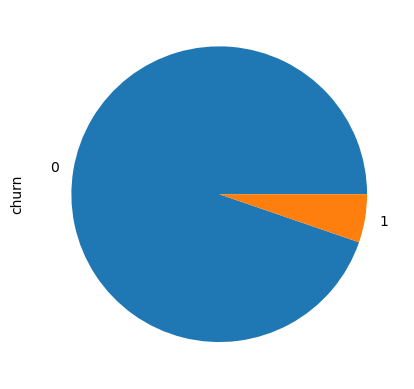

In [244]:
# lets find out churn/non churn percentage
print((df['churn'].value_counts()/len(df))*100)
((df['churn'].value_counts()/len(df))*100).plot(kind="pie")
plt.show()

In [245]:
# Selecting all the churn phase columns in order to drop then

churn_phase_cols = [col for col in df.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [246]:
# Dropping the selected churn phase columns
df.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
df.shape

(5575, 141)

### Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [247]:
# creating a list of column names for each month
mon_6_cols = [col for col in df.columns if '_6' in col]
mon_7_cols = [col for col in df.columns if '_7' in col]
mon_8_cols = [col for col in df.columns if '_8' in col]

In [248]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
df_corr = df.corr()
df_corr.loc[:,:] = np.tril(df_corr, k=-1)
df_corr = df_corr.stack()
df_corr
df_corr[(df_corr > 0.80) | (df_corr < -0.80)].sort_values(ascending=False)

overall_rech_amt_6  total_rech_amt_data_6    0.980281
overall_rech_amt_7  total_rech_amt_data_7    0.978537
total_rech_amt_6    arpu_6                   0.969386
total_rech_amt_8    arpu_8                   0.966800
total_rech_amt_7    arpu_7                   0.966065
og_others_8         og_others_7              0.953367
total_ic_mou_6      loc_ic_mou_6             0.903864
loc_og_t2t_mou_8    loc_og_t2t_mou_7         0.892909
sachet_2g_6         total_rech_data_6        0.884277
loc_og_mou_8        loc_og_mou_7             0.882564
total_ic_mou_8      loc_ic_mou_8             0.881536
total_ic_mou_7      loc_ic_mou_7             0.873801
sachet_2g_7         total_rech_data_7        0.873332
loc_ic_mou_8        loc_ic_t2m_mou_8         0.868518
sachet_2g_8         total_rech_data_8        0.868166
loc_ic_mou_7        loc_ic_t2m_mou_7         0.867163
loc_ic_mou_6        loc_ic_t2m_mou_6         0.863544
onnet_mou_8         onnet_mou_7              0.858739
loc_og_t2m_mou_8    loc_og_t

In [249]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]
df.drop(col_to_drop, axis=1, inplace=True)

In [250]:
# The curent dimension of the dataset after dropping few unwanted columns
df.shape

(5575, 129)

##  Deriving new variables to understand the data

In [251]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
df['tenure'] = (df['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
df.drop('aon',axis=1, inplace=True)

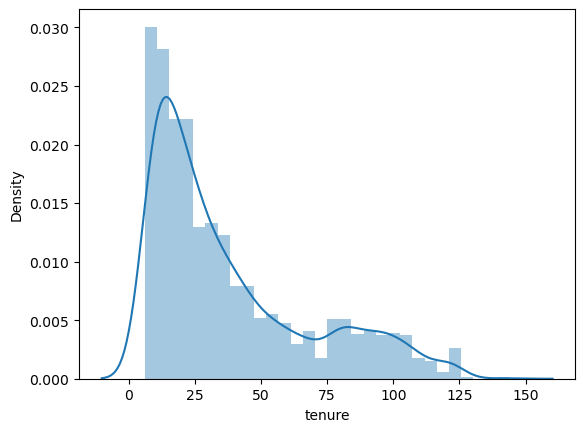

In [252]:
# Checking the distribution of he tenure variable

sns.distplot(df['tenure'],bins=30)
plt.show()

In [253]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df['tenure_range'] = pd.cut(df['tenure'], tn_range, labels=tn_label)
df['tenure_range'].head()

33     2-5 Yrs
53     1-2 Yrs
56     1-2 Yrs
57     NaN    
133    2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

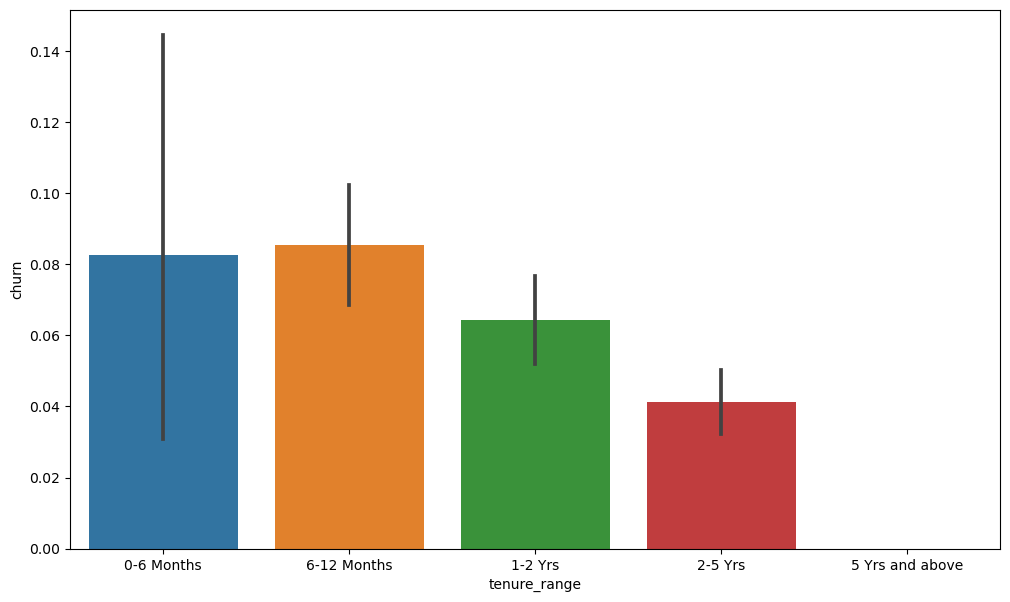

In [254]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=df)
plt.show()

In [255]:
df["avg_arpu_6_7"]= (df['arpu_6']+df['arpu_7'])/2
df['avg_arpu_6_7'].head()

33     1669.9265
53     1059.6865
56     386.5860 
57     944.5010 
133    866.7425 
Name: avg_arpu_6_7, dtype: float64

In [256]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

df.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
df.shape

(5575, 129)

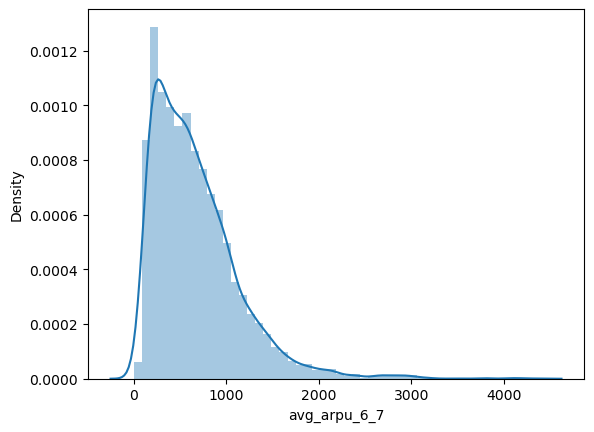

In [257]:
# Visualizing the column created
sns.distplot(df['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

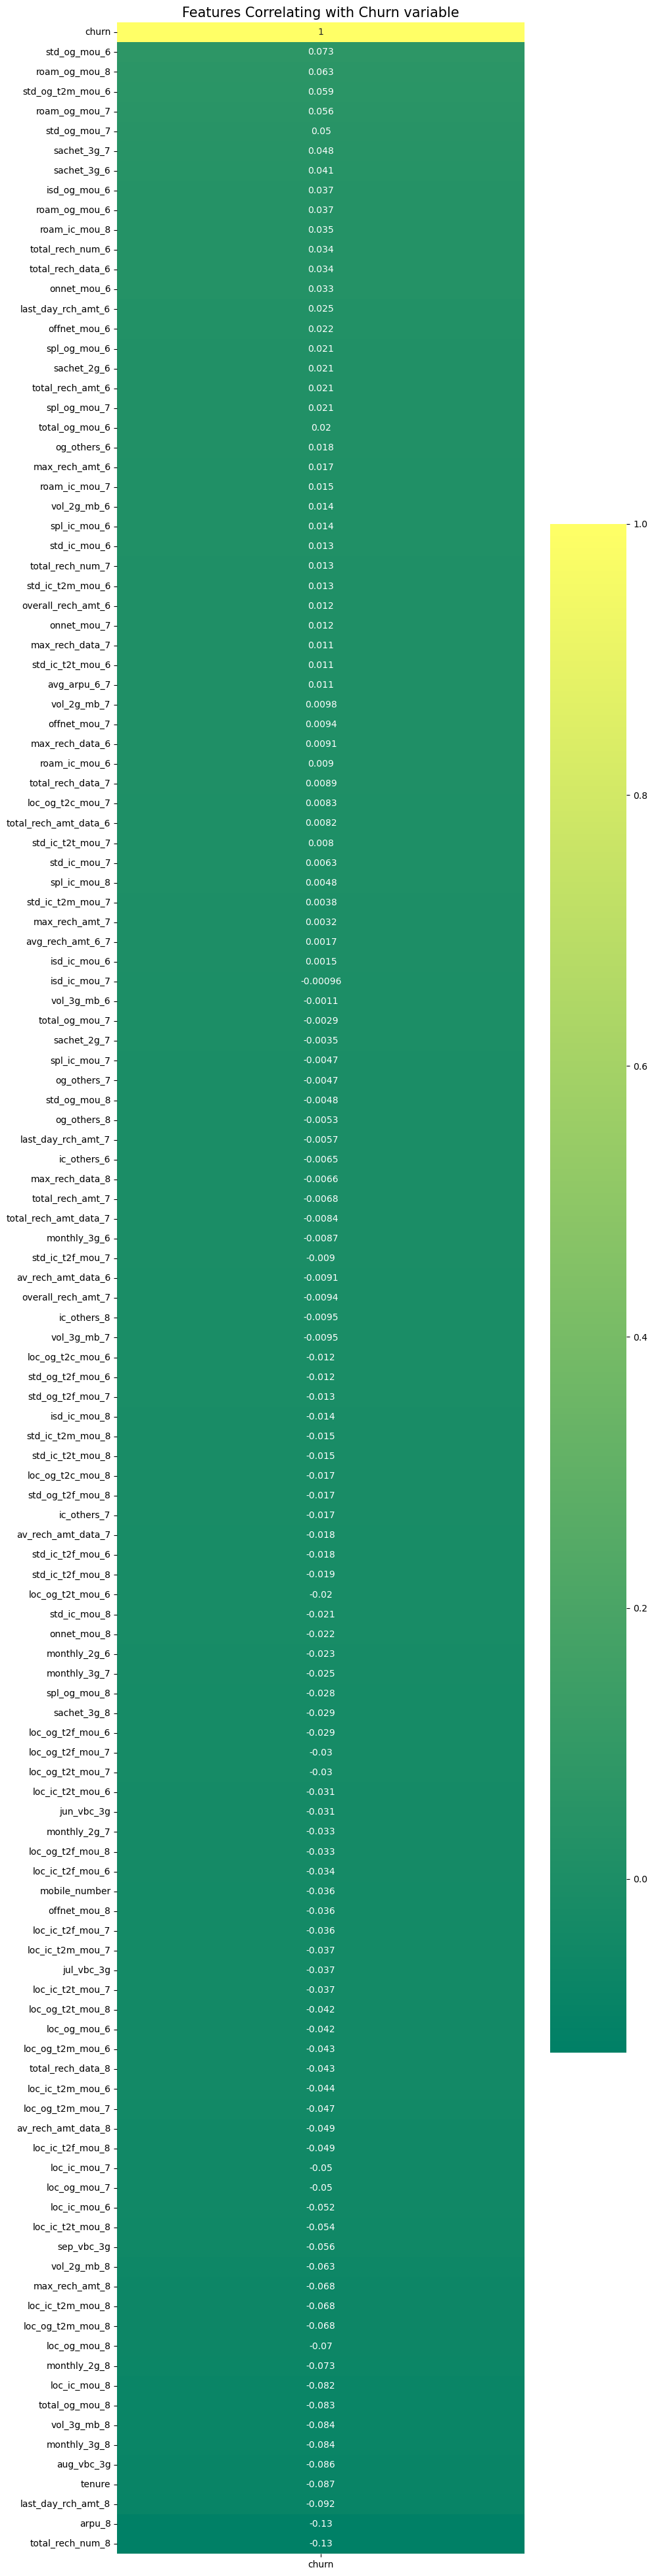

In [258]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(df.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

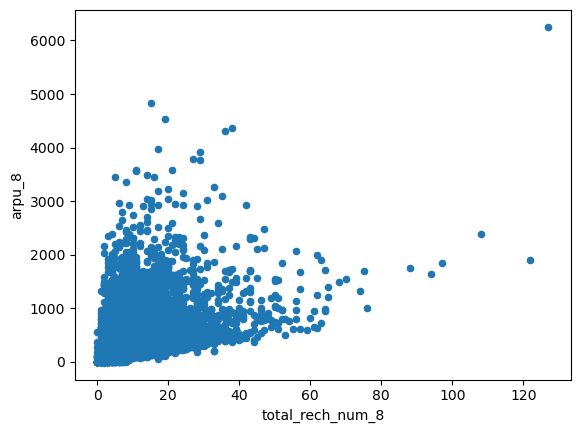

In [259]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

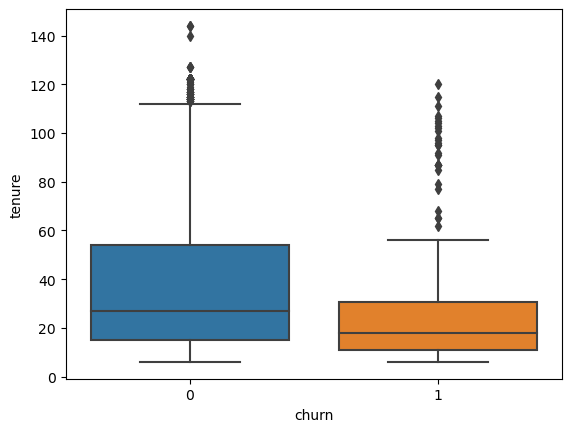

In [260]:
sns.boxplot(x = df.churn, y = df.tenure)

plt.show()

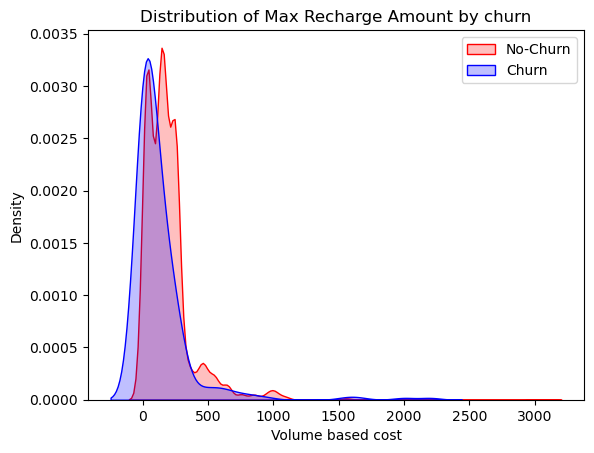

In [261]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(df.max_rech_amt_8[(df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df.max_rech_amt_8[(df["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

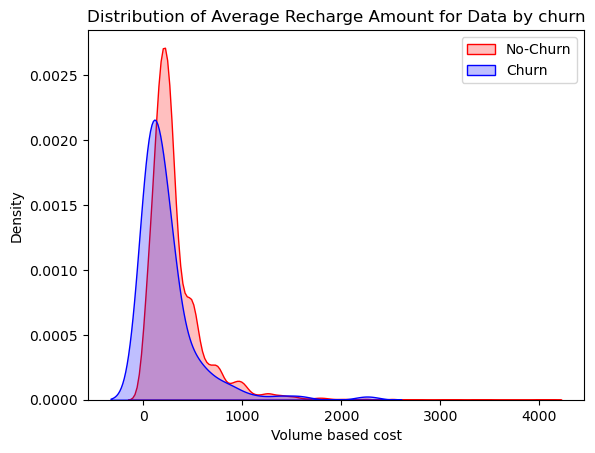

In [262]:
# churn vs max rechare amount
ax = sns.kdeplot(df.av_rech_amt_data_8[(df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df.av_rech_amt_data_8[(df["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [263]:
# Creating categories for month 8 column totalrecharge and their count
df['total_rech_data_group_8']=pd.cut(df['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
df['total_rech_num_group_8']=pd.cut(df['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     4481
10-25_Recharges    452 
>25_Recharges      32  
No_Recharge        0   
Name: total_rech_data_group_8, dtype: int64


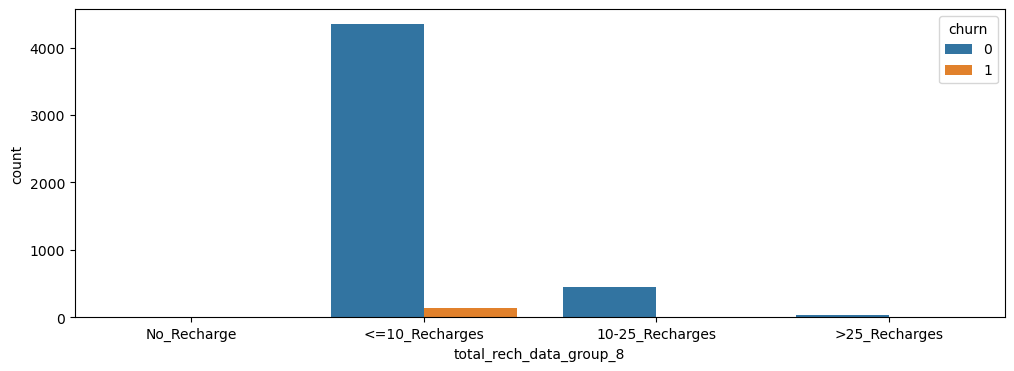

					Distribution of total_rech_num_8 variable
 <=10_Recharges     3086
10-25_Recharges    2013
>25_Recharges      427 
No_Recharge        49  
Name: total_rech_num_group_8, dtype: int64


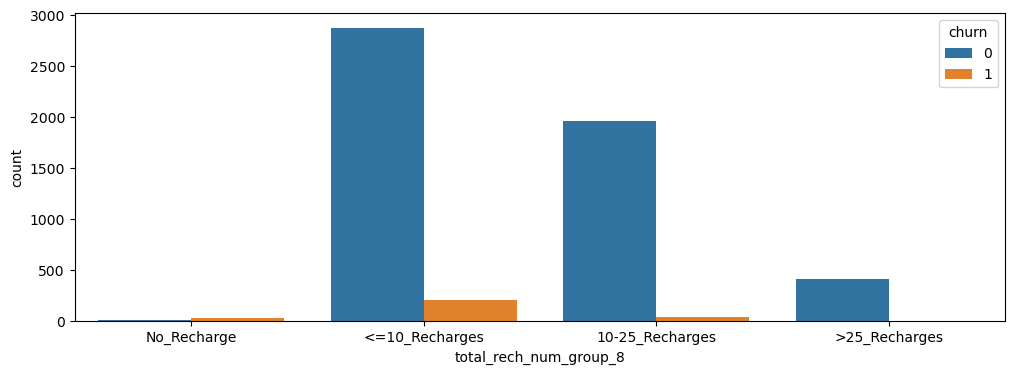

In [264]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=df,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",df['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=df,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",df['total_rech_num_group_8'].value_counts())
plt.show()

In [265]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
33,1,0,0,1,0,0,0,0,1,0
53,1,0,0,0,1,0,0,1,0,0
56,0,1,0,0,1,0,0,1,0,0
57,1,0,0,1,0,0,0,0,0,0
133,1,0,0,1,0,0,0,0,1,0


In [266]:
# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)
df.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
33,7000149764,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.56,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.0,0.0,0.00,0.00,0.56,1.75,0.56,2.45,0.00,0.00,37.93,1.73,0.31,0.16,3.48,0.88,40.54,0.00,2.91,0.05,2.95,1.78,0.86,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.0,0.00,1.23,0.65,0.20,7,14,1,1058,2806,252,1255,455,252,0,455,5.0,8.0,1.0,252.0,1255.0,455.0,1057.0,2553.0,455.0,87.05,57.76,7.97,3509.90,8154.65,7701.01,0,0,0,0,0,4,5,1,1,3,0,358.10,2706.83,1714.67,0.0,5285.0,20424.0,6343.0,23230.0,14786.5,0,44.0,2-5 Yrs,1669.9265,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1,0
53,7002188521,706.020,135.14,119.59,102.69,479.31,543.18,261.34,0.0,0.0,0.0,0.0,0.0,0.0,118.44,103.68,102.69,238.58,196.54,138.91,0.00,0.00,0.00,2.64,2.4,0.00,357.03,300.23,241.61,13.96,0.0,0.0,0.00,30.66,52.44,5.23,221.19,5.56,2.40,0.00,0.00,0.0,0.0,614.46,662.78,364.04,366.69,320.14,397.23,224.96,417.89,137.01,0.43,0.00,0.00,592.09,738.04,534.24,33.98,7.74,0.00,221.16,94.23,10.63,0.00,0.00,0.00,255.14,101.98,10.63,0.00,0.0,0.0,0.53,0.0,0.00,0.00,0.00,0.00,24,26,14,1159,1372,120,150,130,0,130,130,4.0,5.0,1.0,23.0,23.0,23.0,86.0,115.0,23.0,0.27,0.00,0.00,0.00,0.00,0.00,0,0,0,4,5,0,0,0,0,0,0,0.00,0.00,0.00,0.0,344.0,575.0,1503.0,1947.0,1725.0,0,23.0,1-2 Yrs,1059.6865,<=10_Recharges,10-25_Recharges,1,0,0,0,1,0,0,1,0,0
56,7002180748,368.807,34.46,43.11,50.61,131.59,90.61,84.31,0.0,0.0,0.0,0.0,0.0,0.0,34.46,43.11,50.61,128.41,85.58,73.61,3.18,1.76,4.28,0.00,0.0,4.48,166.06,130.46,128.51,0.00,0.0,0.0,0.00,0.00,0.00,1.93,0.00,1.15,6.78,6.33,2.26,0.0,0.0,169.48,137.24,136.78,39.66,32.29,52.03,145.21,103.54,111.73,0.28,0.00,0.00,

In [267]:
# Creating a copy of the filtered dataframe

df1=df[:].copy()

# Dropping unwanted columns
df1.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [268]:
df1.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.56,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.0,0.0,0.00,0.00,0.56,1.75,0.56,2.45,0.00,0.00,37.93,1.73,0.31,0.16,3.48,0.88,40.54,0.00,2.91,0.05,2.95,1.78,0.86,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.0,0.00,1.23,0.65,0.20,7,14,1,1058,2806,252,1255,455,252,0,455,5.0,8.0,1.0,252.0,1255.0,455.0,1057.0,2553.0,455.0,87.05,57.76,7.97,3509.90,8154.65,7701.01,0,0,0,0,0,4,5,1,1,3,0,358.10,2706.83,1714.67,5285.0,20424.0,6343.0,23230.0,14786.5,0,1669.9265,1,0,0,1,0,0,0,0,1,0
53,706.020,135.14,119.59,102.69,479.31,543.18,261.34,0.0,0.0,0.0,0.0,0.0,0.0,118.44,103.68,102.69,238.58,196.54,138.91,0.00,0.00,0.00,2.64,2.4,0.00,357.03,300.23,241.61,13.96,0.0,0.0,0.00,30.66,52.44,5.23,221.19,5.56,2.40,0.00,0.00,0.0,0.0,614.46,662.78,364.04,366.69,320.14,397.23,224.96,417.89,137.01,0.43,0.00,0.00,592.09,738.04,534.24,33.98,7.74,0.00,221.16,94.23,10.63,0.00,0.00,0.00,255.14,101.98,10.63,0.00,0.0,0.0,0.53,0.0,0.00,0.00,0.00,0.00,24,26,14,1159,1372,120,150,130,0,130,130,4.0,5.0,1.0,23.0,23.0,23.0,86.0,115.0,23.0,0.27,0.00,0.00,0.00,0.00,0.00,0,0,0,4,5,0,0,0,0,0,0,0.00,0.00,0.00,344.0,575.0,1503.0,1947.0,1725.0,0,1059.6865,1,0,0,0,1,0,0,1,0,0
56,368.807,34.46,43.11,50.61,131.59,90.61,84.31,0.0,0.0,0.0,0.0,0.0,0.0,34.46,43.11,50.61,128.41,85.58,73.61,3.18,1.76,4.28,0.00,0.0,4.48,166.06,130.46,128.51,0.00,0.0,0.0,0.00,0.00,0.00,1.93,0.00,1.15,6.78,6.33,2.26,0.0,0.0,169.48,137.24,136.78,39.66,32.29,52.03,145.21,103.54,111.73,0.28,0.00,0.00,185.16,135.84,163.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,12,25,25,528,380,154,30,30,20,30,25,2.0,12.0,16.0,154.0,25.0,25.0,308.0,300.0,400.0,516.34,216.86

In [269]:
# lets create X dataset for model building.
X = df1.drop(['churn'],axis=1)

In [270]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.56,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.0,0.0,0.00,0.00,0.56,1.75,0.56,2.45,0.00,0.00,37.93,1.73,0.31,0.16,3.48,0.88,40.54,0.00,2.91,0.05,2.95,1.78,0.86,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.0,0.00,1.23,0.65,0.20,7,14,1,1058,2806,252,1255,455,252,0,455,5.0,8.0,1.0,252.0,1255.0,455.0,1057.0,2553.0,455.0,87.05,57.76,7.97,3509.90,8154.65,7701.01,0,0,0,0,0,4,5,1,1,3,0,358.10,2706.83,1714.67,5285.0,20424.0,6343.0,23230.0,14786.5,1669.9265,1,0,0,1,0,0,0,0,1,0
53,706.020,135.14,119.59,102.69,479.31,543.18,261.34,0.0,0.0,0.0,0.0,0.0,0.0,118.44,103.68,102.69,238.58,196.54,138.91,0.00,0.00,0.00,2.64,2.4,0.00,357.03,300.23,241.61,13.96,0.0,0.0,0.00,30.66,52.44,5.23,221.19,5.56,2.40,0.00,0.00,0.0,0.0,614.46,662.78,364.04,366.69,320.14,397.23,224.96,417.89,137.01,0.43,0.00,0.00,592.09,738.04,534.24,33.98,7.74,0.00,221.16,94.23,10.63,0.00,0.00,0.00,255.14,101.98,10.63,0.00,0.0,0.0,0.53,0.0,0.00,0.00,0.00,0.00,24,26,14,1159,1372,120,150,130,0,130,130,4.0,5.0,1.0,23.0,23.0,23.0,86.0,115.0,23.0,0.27,0.00,0.00,0.00,0.00,0.00,0,0,0,4,5,0,0,0,0,0,0,0.00,0.00,0.00,344.0,575.0,1503.0,1947.0,1725.0,1059.6865,1,0,0,0,1,0,0,1,0,0
56,368.807,34.46,43.11,50.61,131.59,90.61,84.31,0.0,0.0,0.0,0.0,0.0,0.0,34.46,43.11,50.61,128.41,85.58,73.61,3.18,1.76,4.28,0.00,0.0,4.48,166.06,130.46,128.51,0.00,0.0,0.0,0.00,0.00,0.00,1.93,0.00,1.15,6.78,6.33,2.26,0.0,0.0,169.48,137.24,136.78,39.66,32.29,52.03,145.21,103.54,111.73,0.28,0.00,0.00,185.16,135.84,163.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,12,25,25,528,380,154,30,30,20,30,25,2.0,12.0,16.0,154.0,25.0,25.0,308.0,300.0,400.0,516.34,216.86,603.58,15

In [271]:
# lets create y dataset for model building.
y=df1['churn']
y.head()

33     0
53     0
56     0
57     0
133    0
Name: churn, dtype: int32

In [272]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (3902, 134)
Dimension of X_test: (1673, 134)


In [273]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3902 entries, 69148 to 92902
Data columns (total 134 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   l

In [274]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [275]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [276]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
69148,0.086662,0.000942,0.001439,0.000000,0.013346,0.000541,0.000051,0.0,0.0,0.000000,0.0,0.0,0.0,0.001006,0.001180,0.000000,0.000319,0.000956,0.000000,0.000000,0.000000,0.000000,0.026251,0.001525,0.001080,0.001242,0.001567,0.000000,0.015844,0.0,0.0,0.0,0.013060,0.000369,0.000000,0.0,0.007355,0.001060,0.000398,0.000000,0.0,0.000000,0.014509,0.001878,0.000035,0.000945,0.000000,0.000000,0.000011,0.000586,0.000872,0.000000,0.000000,0.000000,0.000809,0.000567,0.000828,0.000083,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000072,0.000000,0.000000,0.012652,0.0,0.009631,0.0,0.000000,0.0,0.000000,0.000000,0.000864,0.295652,0.160584,0.283465,0.063092,0.070899,0.012000,0.051333,0.006667,0.010932,0.008095,0.010309,0.316667,0.283019,0.559322,0.010989,0.098456,0.005818,0.010789,0.027039,0.028784,0.211081,0.159519,0.141669,0.001018,0.024385,0.036833,0.0,0.2,0.0,0.476190,0.312500,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.088668,0.048862,0.003270,0.016837,0.034550,0.019660,0.040860,0.018323,0.093236,0,0,1,0,0,1,0,0,0,0
10944,0.009885,0.000000,0.000000,0.000000,0.001479,0.001726,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017554,0.002871,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.022198,0.025276,0.000000,0.000000,0.0,0.000000,0.001505,0.001468,0.000000,0.004704,0.005771,0.000628,0.002413,0.011281,0.005667,0.000000,0.003079,0.000000,0.006284,0.016072,0.005824,0.000000,0.000108,0.0,0.001377,0.001494,0.000000,0.000000,0.0,0.0,0.001303,0.000848,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.022409,0.024115,0.034783,0.102190,0.047244,0.008190,0.032227,0.008333,0.008333,0.008333,0.016077,0.011905,0.015161,0.033333,0.226415,0.050847,0.010989,0.015444,0.010989,0.00742